# Лабораторная 2. Метод главных компонент

## 1 task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


Исправить файл

In [2]:
path = 'https://courses.openedu.ru/assets/courseware/v1/8bdd28d842a8a41e276f5926d1c4ad3e/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/17_36.csv'

In [4]:
X = pd.read_csv(path)

In [5]:
X = pd.concat([pd.DataFrame([X.columns.values], columns=X.columns).astype(float), X], ignore_index=True)

In [6]:
X.columns = [0,1,2,3,4,5,6,7,8,9]
X.head()

,0,1,2,3,4,5,6,7,8,9
0,18.243573,-22.653569,22.309877,7.419915,11.340017,14.677879,21.710079,-16.044916,14.837784,17.603029
1,-9.430238,1.678058,-14.467071,-20.550316,12.975133,6.637655,8.554817,2.305051,-22.680074,-7.981434
2,-10.022883,3.002050,-6.020823,16.048245,-2.825655,-20.018559,-16.333980,-20.734059,11.240637,-8.921219
3,-7.762322,4.105197,-15.804436,-23.349555,15.150950,5.703130,5.286390,3.110961,-24.790528,-8.042308
4,24.246152,-20.563063,19.739461,16.921785,-21.934323,8.019478,4.082214,6.760828,-4.147755,-11.343656


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       60 non-null     float64
 1   1       60 non-null     float64
 2   2       60 non-null     float64
 3   3       60 non-null     float64
 4   4       60 non-null     float64
 5   5       60 non-null     float64
 6   6       60 non-null     float64
 7   7       60 non-null     float64
 8   8       60 non-null     float64
 9   9       60 non-null     float64
dtypes: float64(10)
memory usage: 4.8 KB


In [20]:
pca = PCA(n_components=2, svd_solver='full')

In [21]:
p_components = pca.fit_transform(X)

In [22]:
componentsDf = pd.DataFrame(data = p_components)
componentsDf.head(2)

,0,1
0,25.238478,-29.266626
1,-25.981286,23.687484


In [23]:
varOriginal = sum(np.var(X))
varSimplified = sum(np.var(componentsDf))
disp = varSimplified / varOriginal
disp

0.6938943224471702

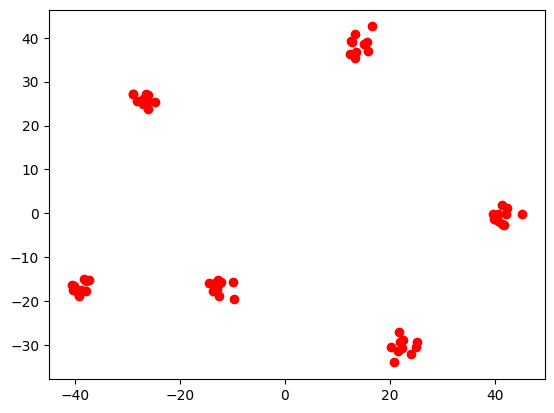

In [24]:
plt.plot(componentsDf[0], componentsDf[1], 'ro')

## 2 task

In [25]:
path_load = 'https://courses.openedu.ru/assets/courseware/v1/4483bfe3a8c24dc8e098826c7e9c965c/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/X_loadings_428.csv'
path_reduced = 'https://courses.openedu.ru/assets/courseware/v1/8dfcbb8848f3fe3174869d9fa9f49b02/asset-v1:ITMOUniversity+MLDATAN+spring_2023_ITMO_bac+type@asset+block/X_reduced_428.csv'

In [26]:
X_load = pd.read_csv(path_load, delimiter=';')
X_load = pd.concat([pd.DataFrame([X_load.columns.values], columns=X_load.columns).astype(float), X_load], ignore_index=True)
X_load.columns = np.arange(0,10)
X_load.head()

,0,1,2,3,4,5,6,7,8,9
0,-1.022699e-17,1.068461e-17,5.078891e-18,1.563084e-17,-1.321720e-17,-5.208172e-18,-3.321924e-18,-2.273726e-17,-5.638440e-18,-6.778714e-18
1,-1.110223e-16,5.551115e-17,2.775558e-17,2.775558e-17,1.249001e-16,-1.734723e-17,-4.510281e-17,9.020562e-17,2.099015e-16,1.526557e-16
2,-0.000000e+00,0.000000e+00,1.110223e-16,1.665335e-16,-5.551115e-17,-0.000000e+00,6.938894e-18,0.000000e+00,-1.526557e-16,-2.151057e-16
3,-0.000000e+00,0.000000e+00,2.775558e-17,0.000000e+00,-5.551115e-17,5.551115e-17,5.551115e-17,-1.110223e-16,8.326673e-17,-6.938894e-17
4,-0.000000e+00,0.000000e+00,5.551115e-17,0.000000e+00,2.081668e-17,2.775558e-17,-1.387779e-17,1.665335e-16,-0.000000e+00,-1.387779e-17


In [27]:
X_reduced = pd.read_csv(path_reduced, delimiter=';')
X_reduced = pd.concat([pd.DataFrame([X_reduced.columns.values], columns=X_reduced.columns).astype(float), X_reduced], ignore_index=True)
X_reduced.columns = np.arange(0,10)

In [28]:
data = pd.DataFrame(np.dot( X_load, X_reduced.transpose()))

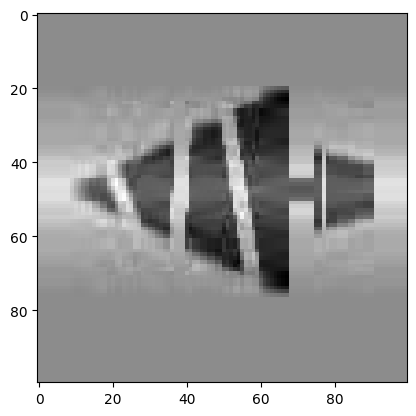

In [29]:
plt.imshow(data, cmap='gray')